
稀疏连接 （sparse connectivity）和平移不变性（translation invariance）是卷积神经网络（CNN）中的两个重要概念。

稀疏连接指的是在卷积神经网络中，每个神经元只与输入数据的一个小区域（称为感受野）相连接，而不是与整个输入数据相连接。这种连接方式有以下几个优点：
1. **减少参数数量**：由于每个神经元只连接到输入数据的一小部分，参数数量大大减少，从而降低了计算复杂度和内存需求。
2. **捕捉局部特征**：稀疏连接使得网络能够更有效地捕捉输入数据中的局部特征，例如图像中的边缘、角点等。
3. **提高泛化能力**：通过减少参数数量，稀疏连接有助于防止过拟合，提高模型的泛化能力。


平移不变性指的是卷积神经网络能够识别输入数据中的特征，无论这些特征出现在输入数据的哪个位置。例如，在图像处理中，如果一个物体在图像的不同位置出现，卷积神经网络仍然能够识别出该物体。平移不变性具有以下优点：
1. **位置无关的特征识别**：卷积操作使得网络能够识别输入数据中的特征，而不受其具体位置的影响。
2. **提高鲁棒性**：平移不变性使得模型在面对输入数据的轻微变动时仍能保持良好的性能。
3. **减少训练数据需求**：由于模型能够识别不同位置的特征，减少了对大量位置多样化训练数据的需求。

综上所述，稀疏连接和平移不变性是卷积神经网络中的关键特性，它们共同促进了CNN在图像处理和其他领域的广泛应用。

![image3.png](mdfiles/image3.png)

输入的特征有 m 个通道，宽为 w，高为 h；输出有 n 个特征图，宽为 w′，高为 h′；卷积核的大小为 kxk。

m、n、k、w、h、w′、h′  我们需要把一个输入为 (m，h，w) 的输入特征图经过卷积计算，生成一个输出为 (n, h′, w′) 的特征图

那我们来看看可以获得这个操作的卷积是什么样子的。__输出特征图的通道数由卷积核的个数决定的，所以说卷积核的个数为 n__。根据卷积计算的定义，输入特征图有 m 个通道，所以每个卷积核里要也要有 m 个通道。所以，我们的需要 n 个卷积核，每个卷积核的大小为 (m, k, k)。

卷积核 1 与全部输入特征进行卷积计算，就获得了输出特征图中第 1 个通道的数据，卷积核 2 与全部输入特征图进行计算获得输出特征图中第 2 个通道的数据。以此类推，最终就能计算 n 个输出特征图。

![image6.png](mdfiles/image6.png)

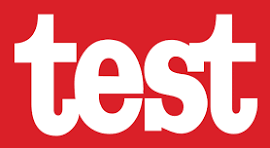

In [60]:
# 读取test.png
import PIL.Image
img = PIL.Image.open("test.png")

display(img)



# Conv2d类

```python
class torch.nn.Conv2d(in_channels, 
                      out_channels, 
                      kernel_size, 
                      stride=1, 
                      padding=0, 
                      dilation=1, 
                      groups=1, 
                      bias=True, 
                      padding_mode='zeros', 
                      device=None, 
                      dtype=None)
```


- in_channels：输入数据的通道数（例如，RGB 图像的通道数为 3）。
- out_channels：卷积层输出数据的通道数，即卷积核的数量。
- kernel_size：卷积核的大小，可以是单个整数（表示正方形卷积核）或一个元组（表示高度和宽度）。
- stride：卷积操作的步幅，默认为 1。    
- padding：在输入数据的边缘添加的零填充数量，默认为 0。
- dilation：卷积核元素之间的间距，默认为 1。__空洞卷积（dilated convolution）可以扩大感受野__。
- groups：控制输入和输出通道之间的连接方式，默认为 1。
- bias：如果为 True，则添加偏置项，默认为 True。
- padding_mode：指定填充的模式，默认为 'zeros'。还有 'reflect'、'replicate' 和 'circular' 可选。
- device：指定张量所在的设备（CPU 或 GPU) like 'cuda:0' or 'cpu'。
- dtype：指定张量的数据类型，例如 torch.float32 或 torch.float64。

我们可以用后面的公式表示当输入有多个通道时，每个卷积核是如何与输入进行计算的：
![image4.png](mdfiles/image4.png)

在卷积神经网络（CNN）中，bias（偏置）是每个卷积核（滤波器）对应的一个可学习参数。它的作用是在卷积操作后对输出特征图进行平移，从而增加模型的表达能力。具体来说，bias 的作用包括：
1. **增加非线性能力**：通过添加 bias，卷积层可以更好地拟合复杂的函数关系，从而提高模型的非线性表达能力。
2. **调整输出范围**：bias 可以帮助调整卷积操作后的输出特征图的数值范围，使其更适合后续的激活函数处理。
3. **提高模型性能**：在某些情况下，添加 bias 可以提高模型的性能，尤其是在处理具有复杂模式的数据时。
4. **防止过拟合**：适当的 bias 可以帮助模型更好地泛化，减少过拟合的风险。
在 PyTorch 中，卷积层（如 `nn.Conv2d`）默认会包含 bias 参数，但也可以通过设置 `bias=False` 来禁用它。


torch.Size([3, 148, 270])


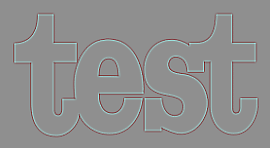

torch.Size([1, 3, 148, 270])


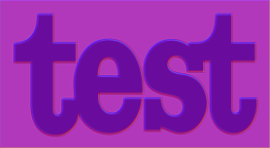

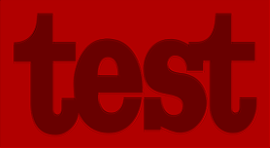

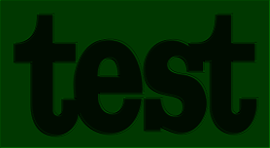

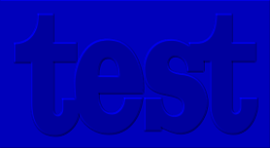

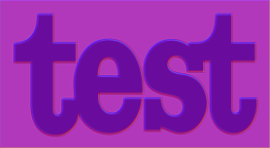

torch.Size([1, 1, 148, 270])


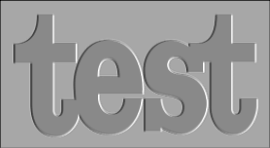

In [61]:
import torch
import torch.nn as nn
import numpy as np
from PIL import Image

img = Image.open('test.png')


def conv_manual(image_tensor, kernel, padding_auto=True):
    # image_tensor: (C, H, W)
    # kernel: (kH, kW)
    C, H, W = image_tensor.shape
    kH, kW = kernel.shape
    if padding_auto:
        pad_h = kH // 2
        pad_w = kW // 2
        image_tensor = torch.nn.functional.pad(image_tensor, (pad_w, pad_w, pad_h, pad_h), mode='reflect')
        H += 2 * pad_h
        W += 2 * pad_w
    out = torch.zeros((C, H - kH + 1, W - kW + 1))
    for c in range(C):
        for i in range(H - kH + 1):
            for j in range(W - kW + 1):
                region = image_tensor[c, i:i + kH, j:j + kW]
                out[c, i, j] = torch.sum(region * kernel)

    return out

# 3 通道输入，3 通道输出 manual convolution
img_tensor = torch.tensor(np.array(img)).permute(2, 0, 1).unsqueeze(0).float()  # (1, 3, H, W)
# manual convolution
# kernel extraction edge detection kernel
kernel = torch.tensor([[-1., -1., -1.],
                       [-1.,  8., -1.],
                       [-1., -1., -1.]])  # (3, 3)
out_manual = conv_manual(img_tensor.squeeze(0), kernel)  # (3, H, W)
print(out_manual.shape)


# 可视化：归一化到 0-255 转回 PIL
o = out_manual.squeeze(0)                     # (3, H, W)
# 归一化到 0-1
o = (o - o.min()) / (o.max() - o.min() + 1e-8)    # [0,1]
# 从 [0,1] 变成 [0,255] 转成 uint8，符合图片格式 把 (C,H,W) → (H,W,C) 从 torch.Tensor 变成 numpy 数组（PIL 需要 numpy 格式）
o = (o * 255).byte().permute(1, 2, 0).numpy()  # (H, W, 3)
o_img = Image.fromarray(o)
display(o_img)

# 3 通道输入，3 通道输出 torch convolution
conv = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)  # 3x3 卷积
# with torch.no_grad():
#     # 举例：固定为 3 个 3x3 全 1 的卷积核
#     conv.weight[:] = 1.0

img_tensor = torch.tensor(np.array(img)).permute(2, 0, 1).unsqueeze(0).float()  # (1, 3, H, W)
out = conv(img_tensor)  # (1, 3, H, W)
print(out.shape)

# 可视化：归一化到 0-255 转回 PIL
o = out.squeeze(0)                     # (3, H, W)
# 归一化到 0-1
o = (o - o.min()) / (o.max() - o.min() + 1e-8)    # [0,1]
# 从 [0,1] 变成 [0,255] 转成 uint8，符合图片格式 把 (C,H,W) → (H,W,C) 从 torch.Tensor 变成 numpy 数组（PIL 需要 numpy 格式）
o = (o * 255).byte().permute(1, 2, 0).numpy()  # (H, W, 3)
o_img = Image.fromarray(o)
display(o_img)

# print the e g b canncel in RGB image separately
# o 是 numpy 格式 (H, W, 3)
# 拆出三个通道
o_r = o[:, :, 0]   # Red
o_g = o[:, :, 1]   # Green
o_b = o[:, :, 2]   # Blue

# 为了能显示为 3 通道图像，要把其它通道补 0
zero = np.zeros_like(o_r)

# 合成伪彩色图像（每次只保留一个通道）
o_r_img = Image.fromarray(np.stack([o_r, zero, zero], axis=2))  # 红色通道
o_g_img = Image.fromarray(np.stack([zero, o_g, zero], axis=2))  # 绿色通道
o_b_img = Image.fromarray(np.stack([zero, zero, o_b], axis=2))  # 蓝色通道

back_img = Image.fromarray(np.stack([o_r, o_g, o_b], axis=2))  # 合成图像

# 显示
display(o_r_img)
display(o_g_img)
display(o_b_img)
display(back_img)

# 3 通道输入，1 通道输出
conv = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=3, stride=1, padding=1)  # 3x3 卷积
img_tensor = torch.tensor(np.array(img)).permute(2, 0, 1).unsqueeze(0).float()  # (1, 3, H, W)

out = conv(img_tensor)  # (1, 1, H, W)
print(out.shape)

# 可视化：归一化到 0-255 转回 PIL
o = out.squeeze(0).squeeze(0)                     # (H, W)
# 归一化到 0-1
o = (o - o.min()) / (o.max() - o.min() + 1e-8)    # [0,1]
# 从 [0,1] 变成 [0,255] 转成 uint8，符合图片格式
o = (o * 255).byte().numpy()  # (H, W)
o_img = Image.fromarray(o)
display(o_img)



## Padding
在卷积神经网络中，Padding（填充）是指在输入数据的边缘添加额外的像素值，以控制卷积操作后输出特征图的空间尺寸。Padding 的主要作用包括：
1. **控制输出尺寸**：通过添加 Padding，可以保持输入和输出特征图的空间尺寸相同，特别是在使用较小的卷积核时。例如，使用 3x3 卷积核时，如果不进行 Padding，输出特征图的尺寸会比输入特征图小 2 个像素（每边减少 1 个像素）。通过添加适当的 Padding，可以使输出特征图的尺寸与输入特征图相同。
2. **保留边缘信息**：在没有 Padding 的情况下，卷积操作会忽略输入数据的边缘像素，这可能导致边缘信息的丢失。通过添加 Padding，可以确保边缘像素也被卷积核覆盖，从而保留更多的边缘信息。
3. **改善特征提取**：Padding 有助于卷积核在输入数据的各个位置进行特征提取，尤其是在输入数据较小或卷积核较大时。通过添加 Padding，可以增加卷积核与输入数据的重叠区域，从而提高特征提取的效果。
4. **实现平移不变性**：Padding 有助于实现卷积神经网络的平移不变性，使得模型能够识别输入数据中的特征，无论这些特征出现在输入数据的哪个位置。
总之，Padding 是卷积神经网络中的一个重要技术，它通过控制输出尺寸、保留边缘信息和改善特征提取，提升了模型的性能和鲁棒性。



In [62]:
# 验证same 方式

import torch
import torch.nn as nn

input_feat = torch.tensor([[4, 1, 7, 5], [4, 4, 2, 5], [7, 7, 2, 4], [1, 0, 2, 4]], dtype=torch.float32)
print(input_feat)
print(input_feat.shape)


tensor([[4., 1., 7., 5.],
        [4., 4., 2., 5.],
        [7., 7., 2., 4.],
        [1., 0., 2., 4.]])
torch.Size([4, 4])


In [63]:
conv2d = nn.Conv2d(1, 1, (2, 2), stride=1, padding='same', bias=True)
# 默认情况随机初始化参数
print(conv2d.weight)
print(conv2d.bias)


Parameter containing:
tensor([[[[ 0.2449,  0.3419],
          [-0.3684,  0.4607]]]], requires_grad=True)
Parameter containing:
tensor([-0.1842], requires_grad=True)


In [64]:
conv2d = nn.Conv2d(1, 1, (2, 2), stride=1, padding='same', bias=False)
# 卷积核要有四个维度(输入通道数，输出通道数，高，宽)
kernels = torch.tensor([[[[1, 0], [2, 1]]]], dtype=torch.float32)
conv2d.weight = nn.Parameter(kernels, requires_grad=False)
print(conv2d.weight)
print(conv2d.bias)

print(input_feat.shape)
input_feat_new = torch.tensor([[4, 1, 7, 5], [4, 4, 2, 5], [7, 7, 2, 4], [1, 0, 2, 4]], dtype=torch.float32).unsqueeze(0).unsqueeze(0)
print(input_feat_new)
print(input_feat_new.shape)
output = conv2d(input_feat_new)
print(output)
print(output.shape)


Parameter containing:
tensor([[[[1., 0.],
          [2., 1.]]]])
None
torch.Size([4, 4])
tensor([[[[4., 1., 7., 5.],
          [4., 4., 2., 5.],
          [7., 7., 2., 4.],
          [1., 0., 2., 4.]]]])
torch.Size([1, 1, 4, 4])
tensor([[[[16., 11., 16., 15.],
          [25., 20., 10., 13.],
          [ 9.,  9., 10., 12.],
          [ 1.,  0.,  2.,  4.]]]])
torch.Size([1, 1, 4, 4])


## 思考
padding 为’same’时，stride 可以为 1 以外的数值吗？
可以。当 padding 设置为 'same' 时，卷积操作会自动计算所需的填充量，以确保输出特征图的空间尺寸与输入特征图相同，无论 stride 的值是多少。也就是说，即使 stride 大于 1，'same' padding 仍然会调整填充量，以保持输出尺寸与输入尺寸一致。